In [2]:
%matplotlib inline
import os
print(os.getcwd())
os.chdir('U:\\2017 Fed Challenge')
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import re

C:\Users\amcdonne.CAMPUS\Jupyter Notebooks


In [3]:
path = 'U:\\2017 Fed Challenge\\AllDataFedBS.csv'

In [4]:
wm = lambda x: np.average(x, axis=0, weights = df.loc[x.index, 'TradeAmount'])

In [5]:
df = pd.read_csv(path, memory_map=True, low_memory=False)
df['TransactionCategory'].unique()
df.head()

,TradeDate,ContractualSettlementDate,TradeAmount,Agency,Coupon,Term,CUSIP,TransactionCategory,Price,PrimaryDealer,InvestmentManager
0,Jan 5 2009,Mar 12 2009,100.0,FHLMC,4.0,30,02R04063,Purchase,99.03,Barclays Capital Inc.,Wellington Management Company
1,Jan 5 2009,Mar 12 2009,100.0,FHLMC,4.0,30,02R04063,Purchase,99.28,Barclays Capital Inc.,Wellington Management Company
2,Jan 5 2009,Mar 12 2009,250.0,FHLMC,4.5,30,02R04263,Purchase,100.56,Barclays Capital Inc.,Wellington Management Company
3,Jan 5 2009,Mar 17 2009,50.0,FNMA,4.5,15,01F04243,Purchase,101.76,"Merrill Lynch, Pierce, Fenner & Smith Incorpor...",Wellington Management Company
4,Jan 5 2009,Mar 12 2009,100.0,FHLMC,4.0,30,02R04063,Purchase,99.25,"Merrill Lynch, Pierce, Fenner & Smith Incorpor...",Wellington Management Company


In [6]:
print(len(df.index))
df['CUSIP'].unique

10058


<bound method Series.unique of 0        02R04063
1        02R04063
2        02R04263
3        01F04243
4        02R04063
5        01F04262
6        01N04263
7        02R04263
8        02R04263
9        02R04043
10       02R04063
11       02R05062
12       01F05043
13       02R04263
14       02R05062
15       01F06062
16       01F06262
17       02R04263
18       02R04263
19       02R05263
20       02R05063
21       02R05062
22       01F04063
23       02R04263
24       02R05062
25       01N04263
26       01N04263
27       02R05261
28       02R05261
29       02R06061
           ...   
10028    01F04267
10029    01F05267
10030    02R04267
10031    01F05267
10032    01F04267
10033    02R04267
10034    01F05267
10035    01F05267
10036    01F04267
10037    02R04267
10038    01F05267
10039    01F05267
10040    01F04267
10041    01F05267
10042    02R04267
10043    01F05267
10044    02R04267
10045    01F05267
10046    01F04267
10047    01F05267
10048    01F04267
10049    02R04267
10050    01F052

In [7]:
purchased = df[df.TransactionCategory.isin(['Purchase'])]
sale = df[df.TransactionCategory.isin(['Sale'])]

################### SOLD ###################
       TradeAmount       Coupon         Term        Price
count  1438.000000  1438.000000  1438.000000  1438.000000
mean    417.347079     5.212796    29.325452   103.229312
std     360.377272     0.514835     3.104051     1.823251
min       0.000000     3.500000    15.000000    97.560000
25%     170.000000     5.000000    30.000000   102.090000
50%     445.000000     5.500000    30.000000   103.195000
75%     500.000000     5.500000    30.000000   104.022500
max    3000.000000     6.500000    30.000000   107.520000
count    1438.000000
mean      103.229312
std         1.823251
min        97.560000
25%       102.090000
50%       103.195000
75%       104.022500
max       107.520000
Name: Price, dtype: float64
################### PURCHASED ###############
       TradeAmount       Coupon         Term        Price
count  8620.000000  8620.000000  8620.000000  8620.000000
mean    214.633933     4.825174    29.275522   101.774783
std     189.68088

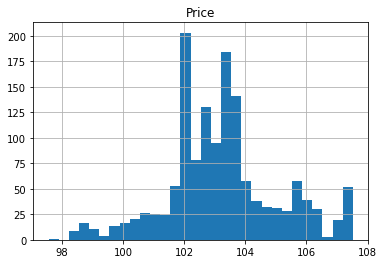

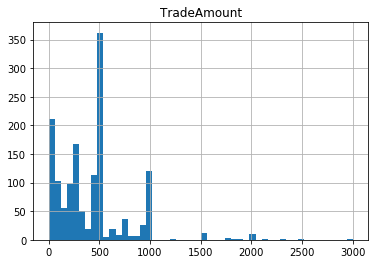

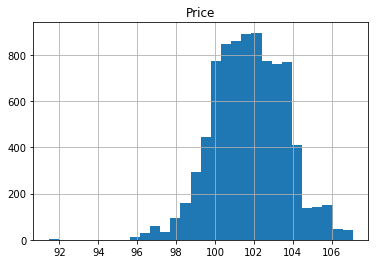

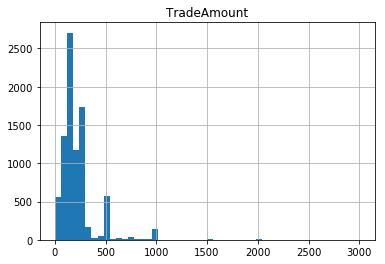

In [8]:
sale.head()
sale.hist(column='Price', bins=30)
sale.hist(column='TradeAmount', bins=50)
print("################### SOLD ###################")
print(sale.describe())
print(sale['Price'].describe())

print("################### PURCHASED ###############")
purchased.hist(column='Price', bins=30)
purchased.hist(column='TradeAmount', bins=50)
print(purchased.describe())
print(purchased['Price'].describe())


In [9]:
purchased['TradeAmount'].groupby(purchased['Agency']).describe()

,count,mean,std,min,25%,50%,75%,max
Agency,,,,,,,,
FHLMC,2615.0,193.693270,121.411476,0.0,150.0,150.0,250.0,1500.0
FNMA,5274.0,230.463197,223.880937,0.0,125.0,175.0,250.0,3000.0
GNMA,731.0,175.340219,70.958167,18.0,150.0,150.0,200.0,750.0


In [10]:
sale['TradeAmount'].groupby(sale['Agency']).describe()

,count,mean,std,min,25%,50%,75%,max
Agency,,,,,,,,
FHLMC,197.0,361.197970,297.532379,10.0,125.0,250.0,500.0,1500.0
FNMA,1175.0,438.151149,373.536264,0.0,200.0,450.0,500.0,3000.0
GNMA,66.0,214.568182,158.054905,18.0,100.0,200.0,225.0,750.0


In [11]:
# [-1, 10, 25, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000 ]
# ['(0, 10]', '(10,25]', '(25, 50]', '(50, 100]', '(100, 200]', '(200, 300]', '(300, 400]', '(400, 500]', '(500, 600]', '(600, 700]', '(700, 800]', '(800, 900]', '(900, 1000]', '(1000, 1500]', '(1500, 2000]', '(2000, 2500]','(2500, 3000]']
SaleTradeCut = [-1, 50, 100, 200, 300, 400, 500, 1000, 3000]
PurchasedTradeCut = [-1, 10, 50, 100, 150, 200, 250, 300, 500, 700, 1000, 2000, 3000]

SaleTradeBin = ['(0, 50]','(50, 100]', '(100, 200]', '(200, 300]', '(300, 400]', '(400, 500]', '(500, 1000]', '(1000, 3000]']
PurchasedTradeBin = ['(0, 10]', '(10, 50]', '(50, 100]', '(100, 150]', '(150, 200]', '(200, 250]', '(250, 300]', '(300, 500]', '(500, 700]', '(700, 1000]', '(1000, 2000]', '(2000, 3000]']
print(len(PurchasedTradeCut))
print(len(PurchasedTradeBin))

13
12


In [12]:
sale['TradeAmountBin'] = pd.cut(sale['TradeAmount'], SaleTradeCut, right=True, labels=SaleTradeBin)
purchased['TradeAmountBin'] = pd.cut(purchased['TradeAmount'], PurchasedTradeCut, right=True, labels=PurchasedTradeBin)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
a = OrderedDict([
    ('TradeAmount', ['count','sum','mean']),
    ('Term',{'Weighted Average': wm}),
    ('Coupon',{'Weighted Average': wm}),
    ('Price',{'Weighted Average': wm})
])

In [18]:
saleStrat = sale[['TradeAmount', 'Term', 'Coupon', 'Price']].groupby([sale['Agency'], sale['TradeAmountBin']]).agg(a)
#saleStrat = sale[['TradeAmount', 'Term', 'Coupon', 'Price']].groupby(sale['TradeAmountBin']).agg(a)
saleStrat.to_clipboard()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [19]:
purchasedStrat = purchased[['TradeAmount','Term', 'Coupon', 'Price']].groupby([purchased['Agency'], purchased['TradeAmountBin']]).agg(a)
#purchasedStrat = purchased[['TradeAmount','Term', 'Coupon', 'Price']].groupby(purchased['TradeAmountBin']).agg(a)
purchasedStrat.to_clipboard()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)
